In [54]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

# I. Organizing 

The titles having spaces made it difficult for me to create subests, therefore I added underscores in replacement for the spaces, and this allowed me to create subsets for each.

In [55]:
# 1. Added underscores to column names in order to create subsets.
# 2. Created a column that subtracts Added_Sugar from Total_Sugars giving us Natural_Sugars
# 3. Created a column that subtracts Sat_Fat and Trans_Fat from Total_Fat giving us Fat
# 4. Created subsets with different Menu_Categories: Regular Menu, Beverage Menu, Breakfast Menu...
# 5. Created subsets that ranks a specific variable, or subset + variable, from highest to lowest, and lowest to highest.
# 6. Added subsets to make a set with different sizes of a certain food for comparison: small coke, medium coke, large 

In [56]:
df = pd.read_csv("India_Menu_Under.csv")

In [57]:
# The data set only gave us Total sugars and added sugars but not the natural sugar count so I added it
# Same with fats, it gave us sat fat, and trans fat, but not regular fat count. 
df['Natural_Sugar_(g)'] = df["Total_Sugars_(g)"] - df['Added_Sugars_(g)']
df['Fat_(g)'] = df["Total_fat_(g)"] - df['Sat_Fat_(g)'] - df["Trans_fat_(g)"]

In [58]:
# Reorganizing columns for easier view
df = df[["Menu_Category", "Menu_Items" , 'Per_Serve_Size', 'Energy_(kCal)', 'Protein_(g)', 'Total_fat_(g)', 'Fat_(g)', 'Sat_Fat_(g)',"Trans_fat_(g)",'Cholesterols_(mg)',"Total_carbohydrate_(g)", 'Total_Sugars_(g)', "Natural_Sugar_(g)", "Added_Sugars_(g)", "Sodium_(mg)"]]

In [59]:
# Created a column that gives categorical ranking to a certain data value. Can be done with any data value, and
# any data value + subset. I used the quartile values in the desciprtive statistcs section to create ranges
def f(row):
    if row['Protein_(g)'] > 10:
        val = 'Top 75%'
    elif row['Protein_(g)'] > 4:
        val = "50%"
    elif row['Protein_(g)'] > 0.5:
        val = "25%"  
    else: 
        val = "Below 25%"
    return val
        
df['Protein_Rank'] = df.apply(f, axis=1)

In [60]:
# reorganizes dataframe to place protein ranking, next to protein.
df = df[["Menu_Category", "Menu_Items" , 'Per_Serve_Size', 'Energy_(kCal)', 'Protein_(g)',"Protein_Rank",'Total_fat_(g)', 'Fat_(g)', 'Sat_Fat_(g)',"Trans_fat_(g)",'Cholesterols_(mg)',"Total_carbohydrate_(g)", 'Total_Sugars_(g)', "Natural_Sugar_(g)", "Added_Sugars_(g)", "Sodium_(mg)"]]

In [61]:
# This dataset now has underscores, as well as calculated natural sugars, and fat content.
df.head()

,Menu_Category,Menu_Items,Per_Serve_Size,Energy_(kCal),Protein_(g),Protein_Rank,Total_fat_(g),Fat_(g),Sat_Fat_(g),Trans_fat_(g),Cholesterols_(mg),Total_carbohydrate_(g),Total_Sugars_(g),Natural_Sugar_(g),Added_Sugars_(g),Sodium_(mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,Top 75%,13.83,8.33,5.34,0.16,2.49,56.54,7.90,3.41,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,50%,11.31,6.84,4.27,0.20,1.47,50.27,7.05,2.98,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,Top 75%,39.45,22.15,17.12,0.18,21.85,52.33,8.35,3.08,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,Top 75%,39.10,19.11,19.73,0.26,40.93,59.27,3.50,2.42,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,Top 75%,23.45,12.77,10.51,0.17,25.24,56.96,7.85,3.09,4.76,1051.24


In [62]:
# Creates subsets for each Menu Category in case we only wanted to look at breakfast, regular menu, beverages, etc
regularMenu = df[df.Menu_Category =='Regular Menu']
breakfastMenu = df[df.Menu_Category =='Breakfast Menu']
mcCafeMenu = df[df.Menu_Category =='McCafe Menu']
gourmetMenu = df[df.Menu_Category =='Gourmet Menu']
beverageMenu = df[df.Menu_Category =='Beverages Menu']
condimentMenu = df[df.Menu_Category =='Condiments Menu']

In [63]:
# Organizes any column from higehst to lowest, can be calculated on every column
dfProteinAsc = df.sort_values(['Protein_(g)'], ascending=False)
dfTotalFatAsc = df.sort_values(['Total_fat_(g)'], ascending=False)
dfProteinAsc.head()

,Menu_Category,Menu_Items,Per_Serve_Size,Energy_(kCal),Protein_(g),Protein_Rank,Total_fat_(g),Fat_(g),Sat_Fat_(g),Trans_fat_(g),Cholesterols_(mg),Total_carbohydrate_(g),Total_Sugars_(g),Natural_Sugar_(g),Added_Sugars_(g),Sodium_(mg)
108,Gourmet Menu,Chunky Chipotle American Burger Chicken,301 g,641.36,39.47,Top 75%,31.51,21.71,9.54,0.26,110.37,46.24,9.16,2.84,6.32,1906.27
12,Regular Menu,Chicken Maharaja Mac,296 g,689.12,34.00,Top 75%,36.69,26.11,10.33,0.25,81.49,55.39,8.92,2.78,6.14,1854.71
109,Gourmet Menu,McSpicy Premium Chicken Burger,264.5 g,622.25,31.49,Top 75%,34.65,18.86,15.55,0.24,302.61,43.60,6.07,3.43,2.64,1614.88
107,Gourmet Menu,Chicken Cheese Lava Burger,307 g,834.36,27.37,Top 75%,45.18,27.91,17.00,0.27,73.11,76.03,16.75,6.74,10.01,1745.04
18,Regular Menu,Ghee Rice with Mc Spicy Fried Chicken 1 pc,325 g,720.30,26.91,Top 75%,29.20,23.82,5.08,0.30,31.32,77.47,3.28,2.93,0.35,2399.49


In [64]:
# Creates a subset ordering values from the breakfest menu from lowest to highest, can be done on any column, and reverse.
bfMenuTotalFatDsc = breakfastMenu.sort_values(['Total_fat_(g)'], ascending=True)
bfMenuTotalFatDsc.head()

,Menu_Category,Menu_Items,Per_Serve_Size,Energy_(kCal),Protein_(g),Protein_Rank,Total_fat_(g),Fat_(g),Sat_Fat_(g),Trans_fat_(g),Cholesterols_(mg),Total_carbohydrate_(g),Total_Sugars_(g),Natural_Sugar_(g),Added_Sugars_(g),Sodium_(mg)
44,Breakfast Menu,Espresso,26.5 ml,12.87,0.52,25%,0.03,-0.03,0.03,0.03,0.27,2.55,0.13,0.13,0.0,0.32
46,Breakfast Menu,Americano (S),276.5 ml,12.87,0.52,25%,0.03,-0.03,0.03,0.03,0.27,2.55,0.13,0.13,0.0,0.32
47,Breakfast Menu,Americano (R),347.5 ml,23.07,0.94,25%,0.05,-0.05,0.05,0.05,0.48,4.57,0.24,0.24,0.0,0.57
48,Breakfast Menu,Americano (L),455 ml,26.71,1.09,25%,0.06,-0.06,0.06,0.06,0.55,5.30,0.28,0.28,0.0,0.65
45,Breakfast Menu,Espresso Machiato,76.5 ml,44.98,2.09,25%,2.02,0.45,1.49,0.08,6.27,4.97,2.50,2.50,0.0,26.05


In [65]:
# Subset header
beverageMenu.head()

,Menu_Category,Menu_Items,Per_Serve_Size,Energy_(kCal),Protein_(g),Protein_Rank,Total_fat_(g),Fat_(g),Sat_Fat_(g),Trans_fat_(g),Cholesterols_(mg),Total_carbohydrate_(g),Total_Sugars_(g),Natural_Sugar_(g),Added_Sugars_(g),Sodium_(mg)
115,Beverages Menu,Small Coca-Cola,299 ml,109.56,0.0,Below 25%,0.0,0.0,0.0,0.0,0.0,27.39,27.39,0.0,27.39,21.17
116,Beverages Menu,Medium Coca-Cola,394 ml,151.36,0.0,Below 25%,0.0,0.0,0.0,0.0,0.0,37.84,37.84,0.0,37.84,29.24
117,Beverages Menu,Large Coca-Cola,544 ml,217.36,0.0,Below 25%,0.0,0.0,0.0,0.0,0.0,54.34,54.34,0.0,54.34,41.99
118,Beverages Menu,Small Fanta Oragne,299 ml,129.48,0.0,Below 25%,0.0,0.0,0.0,0.0,0.0,32.37,32.37,0.0,32.37,55.53
119,Beverages Menu,Medium Fanta Orange,394 ml,178.88,0.0,Below 25%,0.0,0.0,0.0,0.0,0.0,44.72,44.72,0.0,44.72,76.71


In [66]:
# Creates a subset with coke and coke sizes for nutriental comparison, will revisit this on the graphs segement.
smallCoke = df[df.Menu_Items =='Small Coca-Cola']
mediumCoke = df[df.Menu_Items =='Medium Coca-Cola']
largeCoke = df[df.Menu_Items =='Large Coca-Cola']

allCoke = pd.concat([smallCoke,mediumCoke,largeCoke], sort=False)

allCoke.head()

,Menu_Category,Menu_Items,Per_Serve_Size,Energy_(kCal),Protein_(g),Protein_Rank,Total_fat_(g),Fat_(g),Sat_Fat_(g),Trans_fat_(g),Cholesterols_(mg),Total_carbohydrate_(g),Total_Sugars_(g),Natural_Sugar_(g),Added_Sugars_(g),Sodium_(mg)
115,Beverages Menu,Small Coca-Cola,299 ml,109.56,0.0,Below 25%,0.0,0.0,0.0,0.0,0.0,27.39,27.39,0.0,27.39,21.17
116,Beverages Menu,Medium Coca-Cola,394 ml,151.36,0.0,Below 25%,0.0,0.0,0.0,0.0,0.0,37.84,37.84,0.0,37.84,29.24
117,Beverages Menu,Large Coca-Cola,544 ml,217.36,0.0,Below 25%,0.0,0.0,0.0,0.0,0.0,54.34,54.34,0.0,54.34,41.99


# II. Descriptive Statistics

In [118]:
# 1. Descriptive Statistics giving Averages, Standard Deviation, Counts, Mins, Max, and Quartile ranges.
# 2. Descriptive Statistics for a subsets giving Averages, Standard Deviation, Counts, Mins, Max, and Quartile ranges.
# 3. Organizes data from highest to lowest, or vice versa, for a certain column; can be done for subsets, and main data frame. 
# 4. Using descriptive statistics, I created a column with categorical ranks, example: If an item is above the 75% quartile range, it would have a categorical rank of Top 75%


In [68]:
# Averages, Standard Deviation, Counts, Mins, Max, and quartile ranges for each column for the entire dataset
df.describe()

,Energy_(kCal),Protein_(g),Total_fat_(g),Fat_(g),Sat_Fat_(g),Trans_fat_(g),Cholesterols_(mg),Total_carbohydrate_(g),Total_Sugars_(g),Natural_Sugar_(g),Added_Sugars_(g),Sodium_(mg)
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,140.000000
mean,244.635461,7.493546,9.991702,4.306950,4.997589,0.687163,26.350071,31.190284,15.464894,5.127943,10.336950,362.064143
std,185.554837,8.336863,10.339511,7.746878,4.900451,6.326136,50.334200,20.602044,15.690202,6.430174,14.283388,473.160490
min,0.000000,0.000000,0.000000,-46.870000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.360000,0.650000,0.460000,0.000000,0.280000,0.060000,1.510000,15.740000,2.330000,0.720000,0.000000,43.895000
50%,219.360000,4.790000,7.770000,1.820000,4.270000,0.150000,8.390000,30.820000,9.160000,2.500000,3.640000,152.025000
75%,339.520000,10.880000,14.160000,7.520000,7.280000,0.220000,31.110000,46.000000,26.950000,7.660000,19.230000,534.240000
max,834.360000,39.470000,45.180000,27.910000,20.460000,75.260000,302.610000,93.840000,64.220000,30.460000,64.220000,2399.490000


In [69]:
# Creates a subset with only the Top 75% quartile of protein values
# Can be done with any value, or value + subset.
top75Protein = df[df.Protein_Rank =='Top 75%']
top75Protein.head()

,Menu_Category,Menu_Items,Per_Serve_Size,Energy_(kCal),Protein_(g),Protein_Rank,Total_fat_(g),Fat_(g),Sat_Fat_(g),Trans_fat_(g),Cholesterols_(mg),Total_carbohydrate_(g),Total_Sugars_(g),Natural_Sugar_(g),Added_Sugars_(g),Sodium_(mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,Top 75%,13.83,8.33,5.34,0.16,2.49,56.54,7.90,3.41,4.49,706.13
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,Top 75%,39.45,22.15,17.12,0.18,21.85,52.33,8.35,3.08,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,Top 75%,39.10,19.11,19.73,0.26,40.93,59.27,3.50,2.42,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,Top 75%,23.45,12.77,10.51,0.17,25.24,56.96,7.85,3.09,4.76,1051.24
5,Regular Menu,Veg Maharaja Mac,306 g,832.67,24.17,Top 75%,37.94,20.83,16.83,0.28,36.19,93.84,11.52,4.60,6.92,1529.22


In [70]:
df.describe()

,Energy_(kCal),Protein_(g),Total_fat_(g),Fat_(g),Sat_Fat_(g),Trans_fat_(g),Cholesterols_(mg),Total_carbohydrate_(g),Total_Sugars_(g),Natural_Sugar_(g),Added_Sugars_(g),Sodium_(mg)
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,140.000000
mean,244.635461,7.493546,9.991702,4.306950,4.997589,0.687163,26.350071,31.190284,15.464894,5.127943,10.336950,362.064143
std,185.554837,8.336863,10.339511,7.746878,4.900451,6.326136,50.334200,20.602044,15.690202,6.430174,14.283388,473.160490
min,0.000000,0.000000,0.000000,-46.870000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.360000,0.650000,0.460000,0.000000,0.280000,0.060000,1.510000,15.740000,2.330000,0.720000,0.000000,43.895000
50%,219.360000,4.790000,7.770000,1.820000,4.270000,0.150000,8.390000,30.820000,9.160000,2.500000,3.640000,152.025000
75%,339.520000,10.880000,14.160000,7.520000,7.280000,0.220000,31.110000,46.000000,26.950000,7.660000,19.230000,534.240000
max,834.360000,39.470000,45.180000,27.910000,20.460000,75.260000,302.610000,93.840000,64.220000,30.460000,64.220000,2399.490000


In [72]:
# Averages, Standard Deviation, Counts, Mins, Max, and quartile ranges for each column for the beverage menu only
# can be done with any subset: breakfastMenu.describe()
beverageMenu.describe()

,Energy_(kCal),Protein_(g),Total_fat_(g),Fat_(g),Sat_Fat_(g),Trans_fat_(g),Cholesterols_(mg),Total_carbohydrate_(g),Total_Sugars_(g),Natural_Sugar_(g),Added_Sugars_(g),Sodium_(mg)
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,143.326471,0.268235,0.308824,0.074118,0.225882,0.008824,0.829412,34.851765,34.677059,0.651176,34.025882,37.604118
std,69.218565,0.597288,0.687667,0.165040,0.502979,0.019648,1.846877,17.441477,17.488661,1.449995,17.738739,29.309633
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.020000
25%,119.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.220000,28.230000,0.000000,26.140000,21.170000
50%,145.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.420000,32.370000,0.000000,32.370000,34.740000
75%,178.880000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.720000,44.720000,0.000000,44.720000,49.890000
max,256.880000,1.520000,1.750000,0.420000,1.280000,0.050000,4.700000,64.220000,64.220000,3.690000,64.220000,110.160000


In [73]:
# Top five proten data values, can be done with any column, as well as column + subsets
dfProteinAsc = df.sort_values(['Protein_(g)'], ascending=False)
dfProteinAsc.head()

,Menu_Category,Menu_Items,Per_Serve_Size,Energy_(kCal),Protein_(g),Protein_Rank,Total_fat_(g),Fat_(g),Sat_Fat_(g),Trans_fat_(g),Cholesterols_(mg),Total_carbohydrate_(g),Total_Sugars_(g),Natural_Sugar_(g),Added_Sugars_(g),Sodium_(mg)
108,Gourmet Menu,Chunky Chipotle American Burger Chicken,301 g,641.36,39.47,Top 75%,31.51,21.71,9.54,0.26,110.37,46.24,9.16,2.84,6.32,1906.27
12,Regular Menu,Chicken Maharaja Mac,296 g,689.12,34.00,Top 75%,36.69,26.11,10.33,0.25,81.49,55.39,8.92,2.78,6.14,1854.71
109,Gourmet Menu,McSpicy Premium Chicken Burger,264.5 g,622.25,31.49,Top 75%,34.65,18.86,15.55,0.24,302.61,43.60,6.07,3.43,2.64,1614.88
107,Gourmet Menu,Chicken Cheese Lava Burger,307 g,834.36,27.37,Top 75%,45.18,27.91,17.00,0.27,73.11,76.03,16.75,6.74,10.01,1745.04
18,Regular Menu,Ghee Rice with Mc Spicy Fried Chicken 1 pc,325 g,720.30,26.91,Top 75%,29.20,23.82,5.08,0.30,31.32,77.47,3.28,2.93,0.35,2399.49


In [74]:
# Top five beverage in order from lowest kCal to highest
# Can be done with any subset, and any value 
# breakfastEnergyAsc = breakfestMenu.sort_values(["Total_Sugars(g)"])
beverageEnergyAsc = beverageMenu.sort_values(['Energy_(kCal)'], ascending=True)
beverageEnergyAsc.head()

,Menu_Category,Menu_Items,Per_Serve_Size,Energy_(kCal),Protein_(g),Protein_Rank,Total_fat_(g),Fat_(g),Sat_Fat_(g),Trans_fat_(g),Cholesterols_(mg),Total_carbohydrate_(g),Total_Sugars_(g),Natural_Sugar_(g),Added_Sugars_(g),Sodium_(mg)
131,Beverages Menu,Vedica Natural Mineral Water,500 ml,0.00,0.0,Below 25%,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,2.90
130,Beverages Menu,Coke Zero Can,330 ml,0.99,0.0,Below 25%,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,24.75
121,Beverages Menu,Small Thums-up,299 ml,99.60,0.0,Below 25%,0.0,0.0,0.0,0.0,0.0,24.90,24.90,0.0,24.90,25.15
115,Beverages Menu,Small Coca-Cola,299 ml,109.56,0.0,Below 25%,0.0,0.0,0.0,0.0,0.0,27.39,27.39,0.0,27.39,21.17
124,Beverages Menu,Small Sprite,299 ml,119.52,0.0,Below 25%,0.0,0.0,0.0,0.0,0.0,29.88,29.88,0.0,29.88,2.02


In [75]:
# 4. Descriptive statistics for custom subsets, in this case all coke sizes
# Interesting that all sugar are added sugars, and none natural.
# Custom subsets can be made from anything, chicken nuggets, burgers, deserts etc.
allCoke.describe()

,Energy_(kCal),Protein_(g),Total_fat_(g),Fat_(g),Sat_Fat_(g),Trans_fat_(g),Cholesterols_(mg),Total_carbohydrate_(g),Total_Sugars_(g),Natural_Sugar_(g),Added_Sugars_(g),Sodium_(mg)
count,3.000000,3.0,3.0,3.0,3.0,3.0,3.0,3.000000,3.000000,3.0,3.000000,3.0000
mean,159.426667,0.0,0.0,0.0,0.0,0.0,0.0,39.856667,39.856667,0.0,39.856667,30.8000
std,54.350836,0.0,0.0,0.0,0.0,0.0,0.0,13.587709,13.587709,0.0,13.587709,10.4973
min,109.560000,0.0,0.0,0.0,0.0,0.0,0.0,27.390000,27.390000,0.0,27.390000,21.1700
25%,130.460000,0.0,0.0,0.0,0.0,0.0,0.0,32.615000,32.615000,0.0,32.615000,25.2050
50%,151.360000,0.0,0.0,0.0,0.0,0.0,0.0,37.840000,37.840000,0.0,37.840000,29.2400
75%,184.360000,0.0,0.0,0.0,0.0,0.0,0.0,46.090000,46.090000,0.0,46.090000,35.6150
max,217.360000,0.0,0.0,0.0,0.0,0.0,0.0,54.340000,54.340000,0.0,54.340000,41.9900


In [76]:
# Counts how many unique values are on a certain variable
df['Menu_Category'].value_counts()

McCafe Menu        51
Regular Menu       36
Beverages Menu     17
Breakfast Menu     15
Gourmet Menu       11
Condiments Menu     9
Desserts Menu       2
Name: Menu_Category, dtype: int64

In [77]:
# Sum of certain variable. If you drank every size of coke, you would have drank 119.57 grams of sugar. 
allCokeSugar = allCoke['Total_Sugars_(g)'].sum()
print(allCokeSugar)

119.57000000000001


# III. Visualization

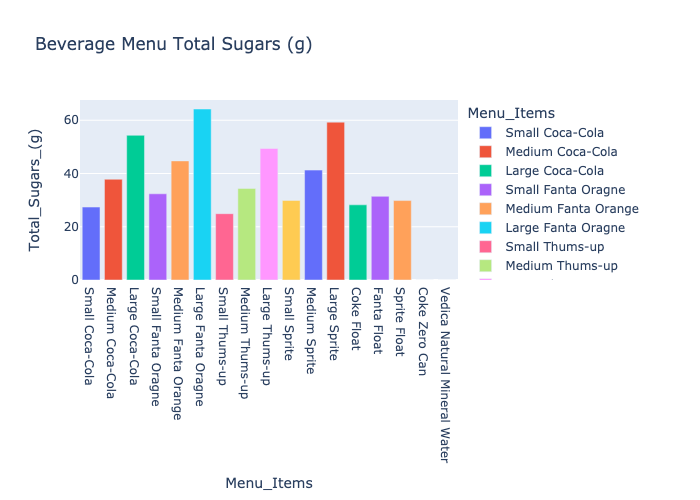

In [104]:
# Bar Graphs
# I love the plotly graphs more than matplotlib because if you hover over the bars, or pie slices, violins, etc, 
# in python it will give you the actual values 
fig = px.bar(beverageMenu, x="Menu_Items", y="Total_Sugars_(g)", color="Menu_Items",title="Beverage Menu Total Sugars (g)")
  
# showing the plot
fig.show("png")

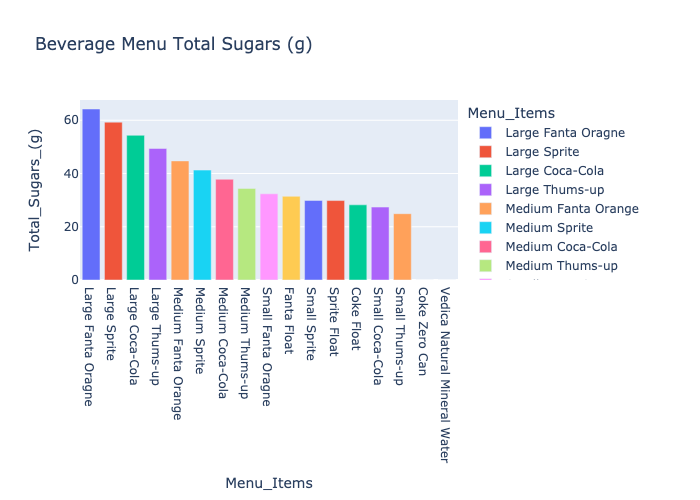

In [107]:
# Organizes Total Sugar from Highest to Lowest
bevMenuTSugarsnAsc = beverageMenu.sort_values(['Total_Sugars_(g)'], ascending=False)
fig = px.bar(bevMenuTSugarsnAsc, x="Menu_Items", y="Total_Sugars_(g)", color="Menu_Items",title="Beverage Menu Total Sugars (g)") 
# showing the plot
fig.show("png")

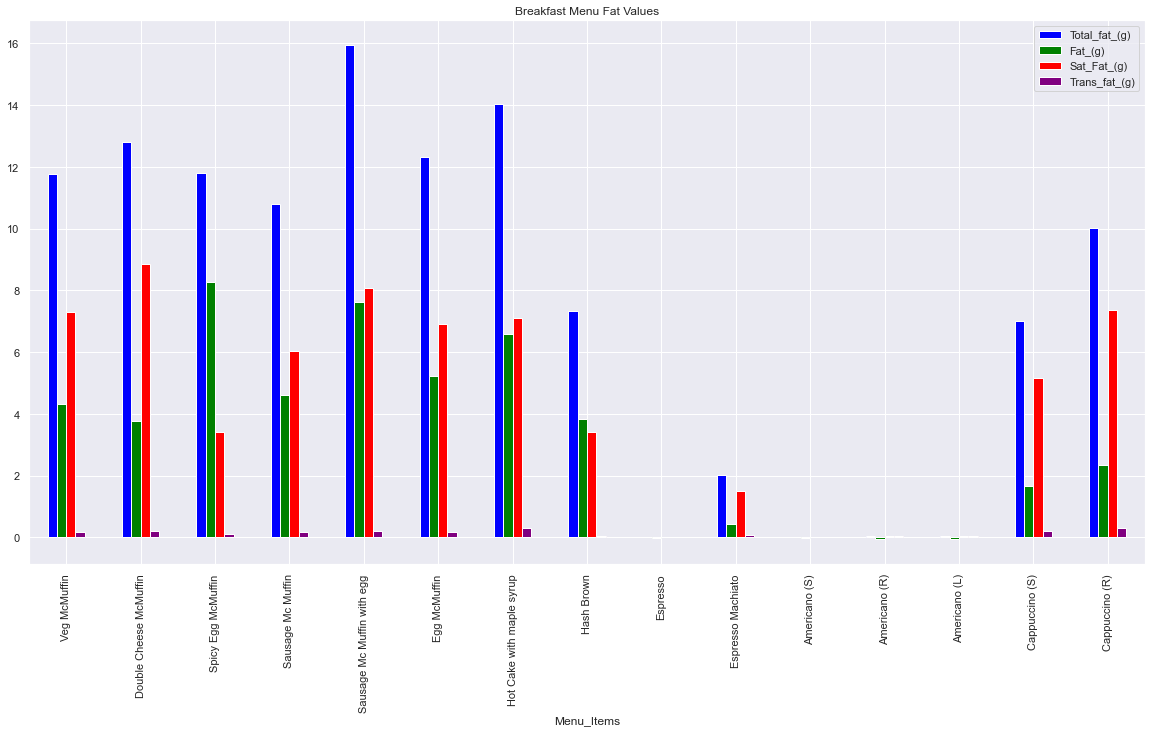

<Figure size 216x72 with 0 Axes>

In [80]:
breakfastMenu[['Menu_Items', 'Total_fat_(g)', 'Fat_(g)', 'Sat_Fat_(g)', "Trans_fat_(g)" ]].plot(x='Menu_Items', kind='bar', color=['blue','green','red',"purple"])
plt.title('Breakfast Menu Fat Values')
f = plt.figure()
f.set_figwidth(3)
f.set_figheight(1)

Text(0.5, 1.0, 'Breakfast Menu Total Fat Values from Highest to Lowest')

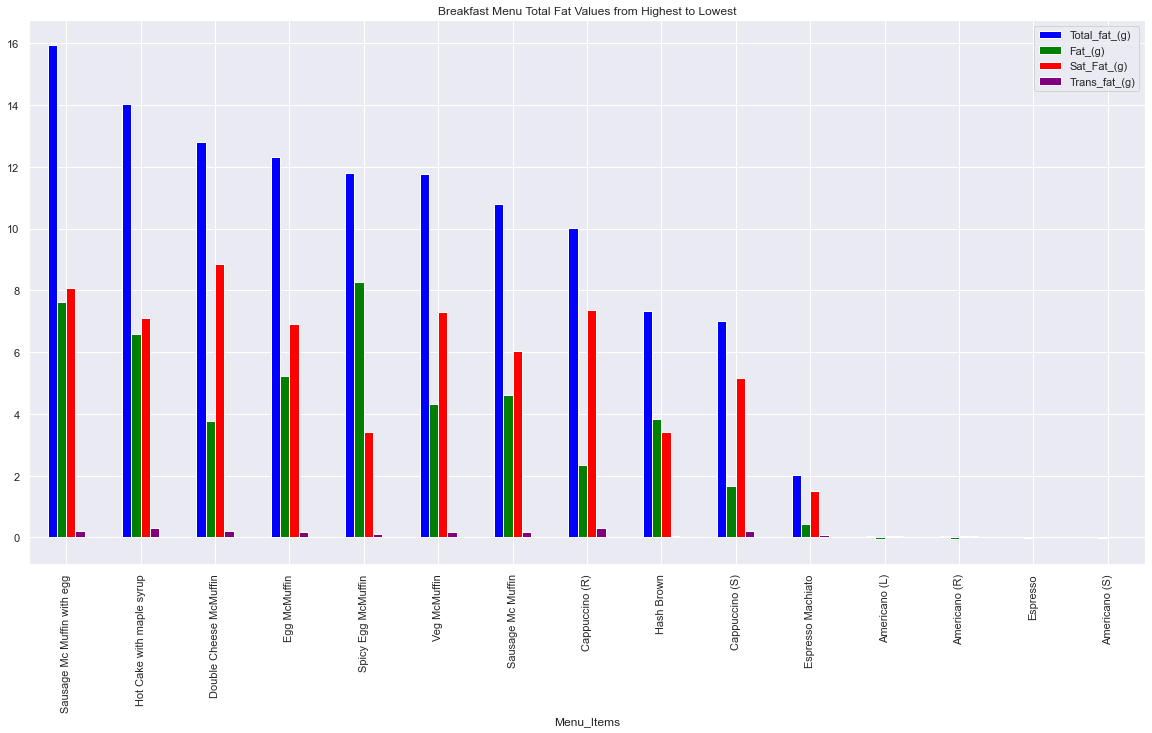

In [110]:
bfastMenuFatAsc = breakfastMenu.sort_values(['Total_fat_(g)'], ascending=False)
bfastMenuFatAsc[['Menu_Items', 'Total_fat_(g)', 'Fat_(g)', 'Sat_Fat_(g)', "Trans_fat_(g)" ]].plot(x='Menu_Items', kind='bar', color=['blue','green','red',"purple"])
plt.title('Breakfast Menu Total Fat Values from Highest to Lowest')

Text(0.5, 1.0, 'Regular Menu Protein vs. Total Carbohydrates Comparison')

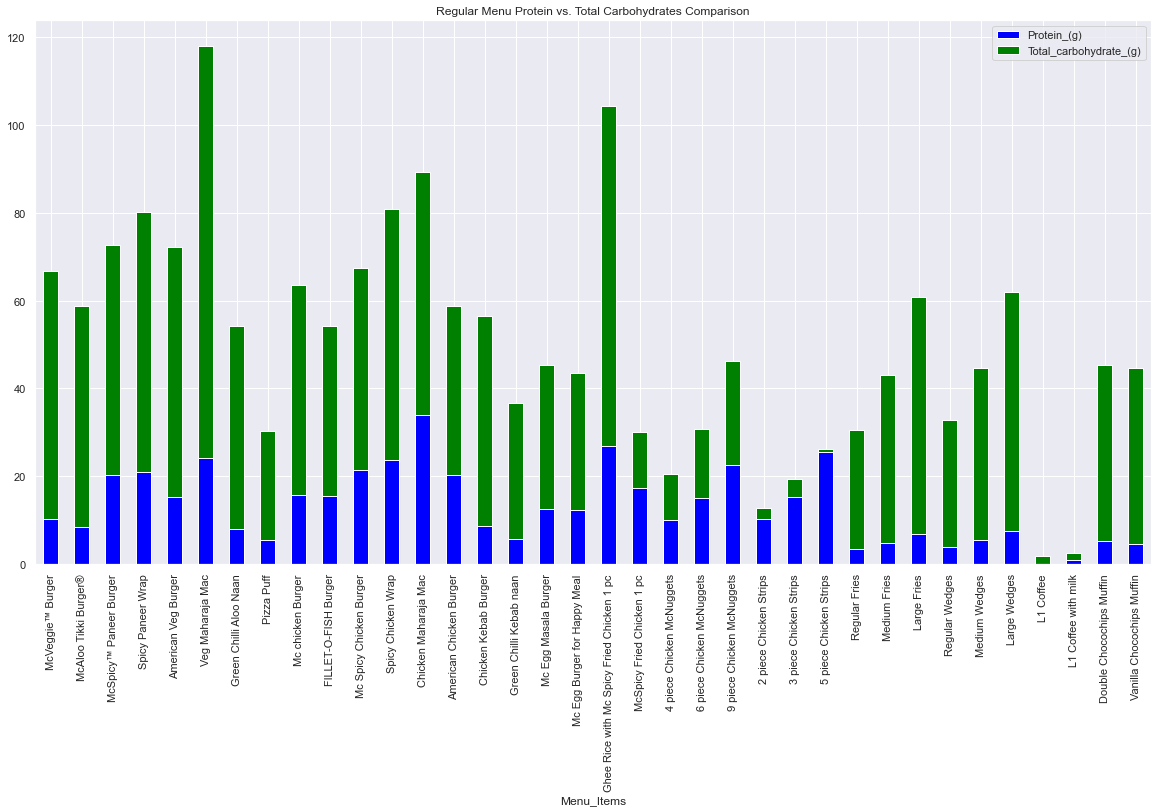

In [82]:
regularMenu[['Menu_Items', 'Protein_(g)', 'Total_carbohydrate_(g)']].plot(x='Menu_Items', kind='bar', stacked=True, color=['blue', 'green',])
plt.title('Regular Menu Protein vs. Total Carbohydrates Comparison')

Text(0.5, 1.0, 'Regular Menu Protein vs. Total Carbohydrates Comparison')

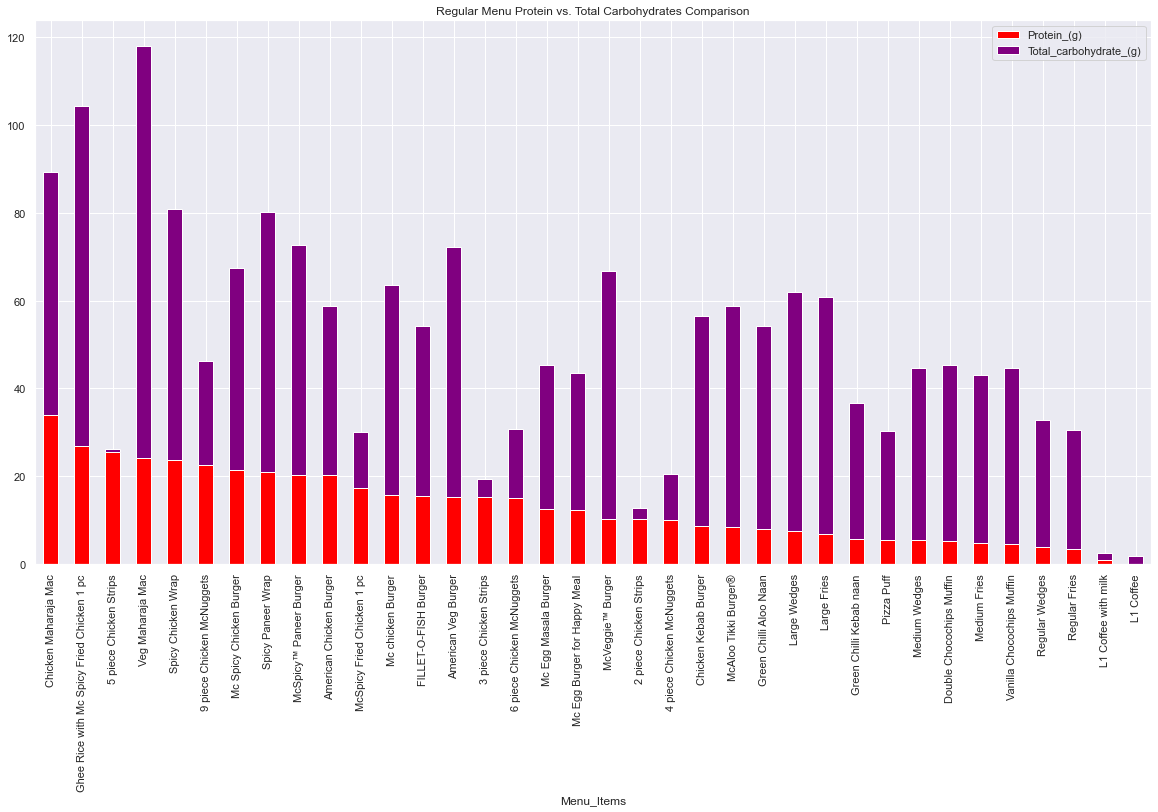

In [83]:
regMenuProtAsc = regularMenu.sort_values(['Protein_(g)'], ascending=False)
regMenuProtAsc[['Menu_Items', 'Protein_(g)', 'Total_carbohydrate_(g)']].plot(x='Menu_Items', kind='bar', stacked=True, color=['red', 'purple',])
plt.title('Regular Menu Protein vs. Total Carbohydrates Comparison')

Text(0.5, 1.0, 'All Variables for a 9pc Chicken Nuggets ')

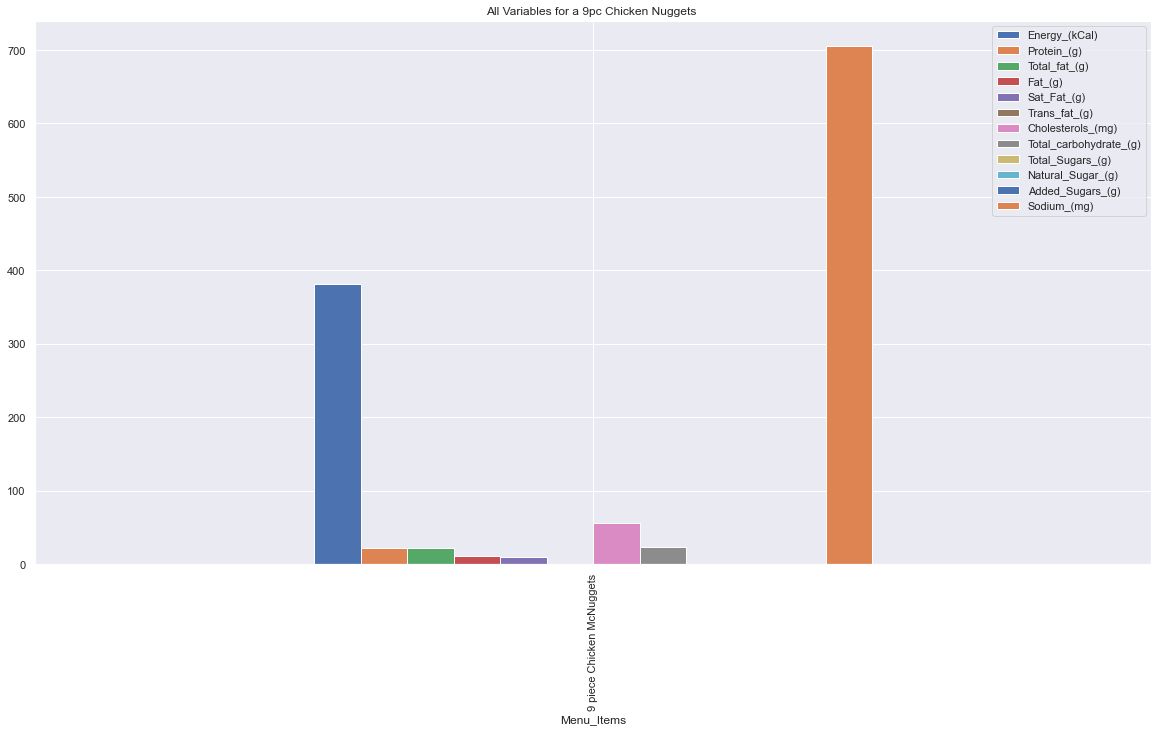

In [84]:
ninePieceMcnugs = df[df.Menu_Items =='9 piece Chicken McNuggets']
ninePieceMcnugs[["Menu_Items", 'Per_Serve_Size', 'Energy_(kCal)', 'Protein_(g)',"Protein_Rank",'Total_fat_(g)', 'Fat_(g)', 'Sat_Fat_(g)',"Trans_fat_(g)",'Cholesterols_(mg)',"Total_carbohydrate_(g)", 'Total_Sugars_(g)', "Natural_Sugar_(g)", "Added_Sugars_(g)", "Sodium_(mg)"]].plot(x='Menu_Items', kind='bar')
sns.set(rc={"figure.figsize":(20, 10)})
plt.title('All Variables for a 9pc Chicken Nuggets ')

Text(0.5, 1.0, 'All Variables for All Sizes of Chicken Nuggets ')

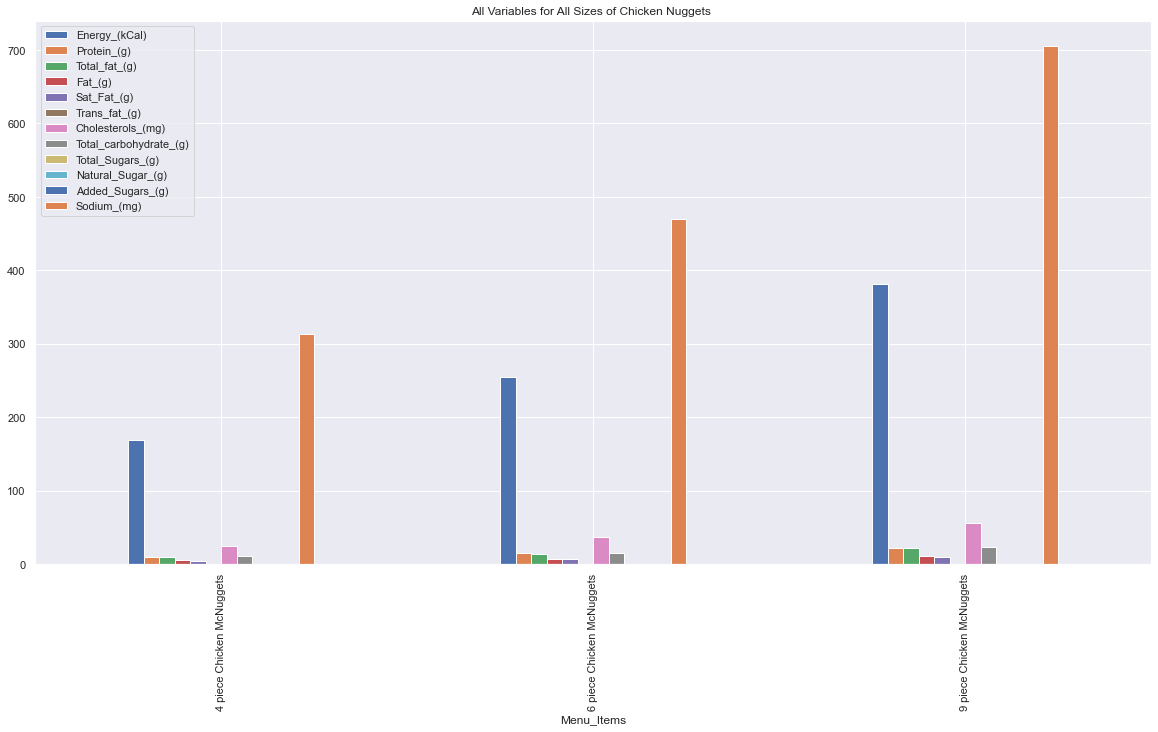

In [85]:
ninePieceMcnugs = df[df.Menu_Items =='9 piece Chicken McNuggets']
sixPieceMcnugs = df[df.Menu_Items =='6 piece Chicken McNuggets']
fourPieceMcnugs = df[df.Menu_Items =='4 piece Chicken McNuggets']

allNugget = pd.concat([fourPieceMcnugs,sixPieceMcnugs,ninePieceMcnugs], sort=False)


allNugget[["Menu_Items", 'Per_Serve_Size', 'Energy_(kCal)', 'Protein_(g)',"Protein_Rank",'Total_fat_(g)', 'Fat_(g)', 'Sat_Fat_(g)',"Trans_fat_(g)",'Cholesterols_(mg)',"Total_carbohydrate_(g)", 'Total_Sugars_(g)', "Natural_Sugar_(g)", "Added_Sugars_(g)", "Sodium_(mg)"]].plot(x='Menu_Items', kind='bar')
sns.set(rc={"figure.figsize":(20, 10)})
plt.title('All Variables for All Sizes of Chicken Nuggets ')

In [86]:
allNugget.head()

,Menu_Category,Menu_Items,Per_Serve_Size,Energy_(kCal),Protein_(g),Protein_Rank,Total_fat_(g),Fat_(g),Sat_Fat_(g),Trans_fat_(g),Cholesterols_(mg),Total_carbohydrate_(g),Total_Sugars_(g),Natural_Sugar_(g),Added_Sugars_(g),Sodium_(mg)
20,Regular Menu,4 piece Chicken McNuggets,64 g,169.68,10.03,Top 75%,9.54,5.03,4.45,0.06,24.66,10.50,0.32,0.32,0.0,313.25
21,Regular Menu,6 piece Chicken McNuggets,96 g,254.52,15.04,Top 75%,14.30,7.52,6.68,0.10,36.99,15.74,0.48,0.48,0.0,469.87
22,Regular Menu,9 piece Chicken McNuggets,144 g,381.77,22.56,Top 75%,21.46,11.30,10.02,0.14,55.48,23.62,0.72,0.72,0.0,704.81


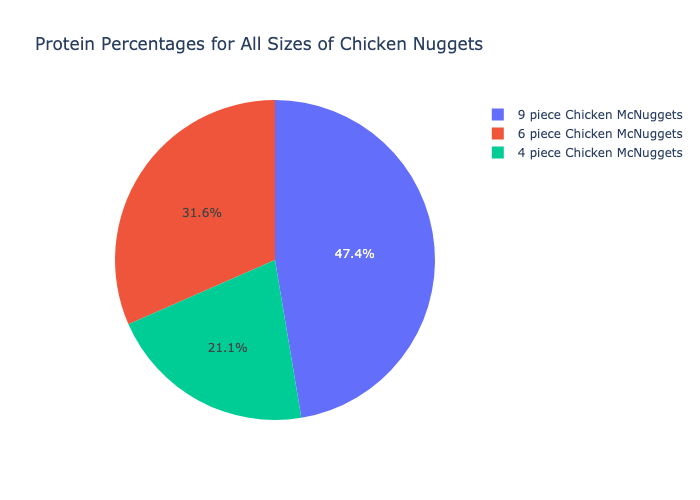

In [111]:
# Pie Charts
fig = px.pie(allNugget, values="Protein_(g)", names="Menu_Items",title="Protein Percentages for All Sizes of Chicken Nuggets")  
# showing the plot
fig.show("png")

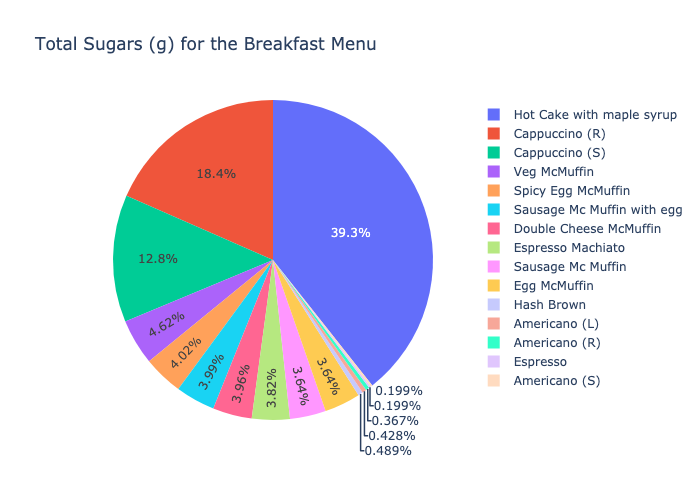

In [113]:
fig = px.pie(breakfastMenu, values="Total_Sugars_(g)", names="Menu_Items",title="Total Sugars (g) for the Breakfast Menu ")  
# showing the plot
fig.show("png")

In [90]:
# Cross table displaying how many protein ranks are in a given category. Example Regular Menu has 21 items in the top 75%
crosstable=pd.crosstab(df['Menu_Category'],df['Protein_Rank'])
crosstable

Protein_Rank,25%,50%,Below 25%,Top 75%
Menu_Category,,,,
Beverages Menu,3,0,14,0
Breakfast Menu,6,4,0,5
Condiments Menu,5,0,4,0
Desserts Menu,2,0,0,0
Gourmet Menu,0,1,0,10
McCafe Menu,19,17,9,6
Regular Menu,3,11,1,21


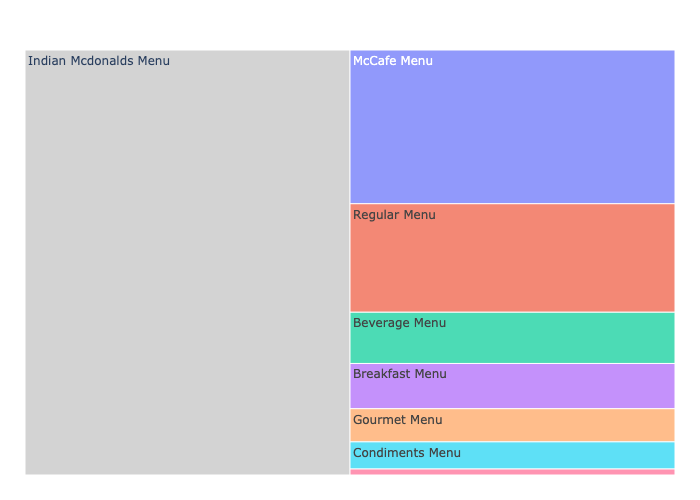

In [122]:
# Icicle Graph displaying each menu and their proportion to the Indian Mcdonalds Menu 
data = dict(
    
    # 7 Characters
    character=["McCafe Menu","Regular Menu","Beverage Menu","Breakfast Menu","Gourmet Menu","Condiments Menu","Desserts Menu"],
    parent = ['Indian Mcdonalds Menu','Indian Mcdonalds Menu','Indian Mcdonalds Menu','Indian Mcdonalds Menu','Indian Mcdonalds Menu','Indian Mcdonalds Menu','Indian Mcdonalds Menu'],
    value=[51, 36, 17, 15, 11, 9, 2])

fig =px.icicle(
    data,
    names='character',
    parents='parent',
    values='value',
)
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show("png")

In [92]:
# Counts how many unique values are on a certain variable
df['Menu_Category'].value_counts()

McCafe Menu        51
Regular Menu       36
Beverages Menu     17
Breakfast Menu     15
Gourmet Menu       11
Condiments Menu     9
Desserts Menu       2
Name: Menu_Category, dtype: int64

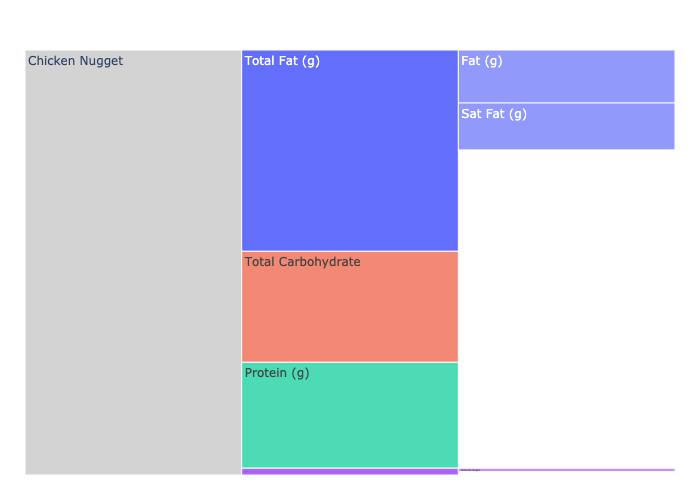

In [121]:
data = dict(
    
    # 7 Characters
    character=["Protein (g)", "Total Fat (g)", "Fat (g)", "Sat Fat (g)","Trans Fat (g)","Total Carbohydrate", "Total Sugar","Natural Suger","Added Sugar"],
    parent = ["Chicken Nugget","Chicken Nugget","Total Fat (g)","Total Fat (g)","Total Fat (g)","Chicken Nugget","Chicken Nugget","Total Sugar","Total Sugar"],
    value=[2.50,2.38,1.25,1.11,.01, 2.62,.08,.08,0])

fig =px.icicle(
    data,
    names='character',
    parents='parent',
    values='value',
)
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show("png")

# I created an icicle chart showing the variables measured in grams, therefore sodium and cholestrerol was left out
# I took the values from a 4 piece chicken nugget, and divided them by 4, to get the values we see in this chart
# A chicken nugget seems to mostly fat, followed by carbs and lastly protein.
# Trans fat is in there, it is just too small to see on the graph. Bottom segement on the left is total sugars, on the right natural sugars

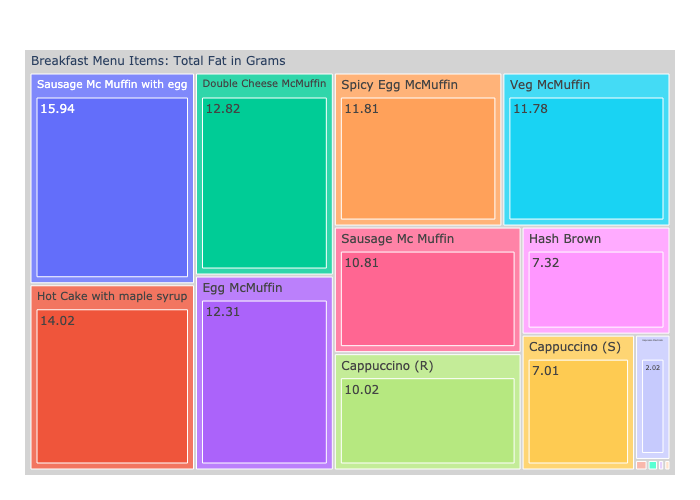

In [119]:
# There are two ways to use this graph, since the interactive version allows us to see both values in the boxes. 
# Example: the title box (box with the name) will have Total Sugars, and the child box (box with the number) 
# will have the number of added sugar. 
fig = px.treemap(breakfastMenu, path=[px.Constant("Breakfast Menu Items: Total Fat in Grams"), 'Menu_Items', 'Total_fat_(g)'], values='Total_fat_(g)')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show("png")

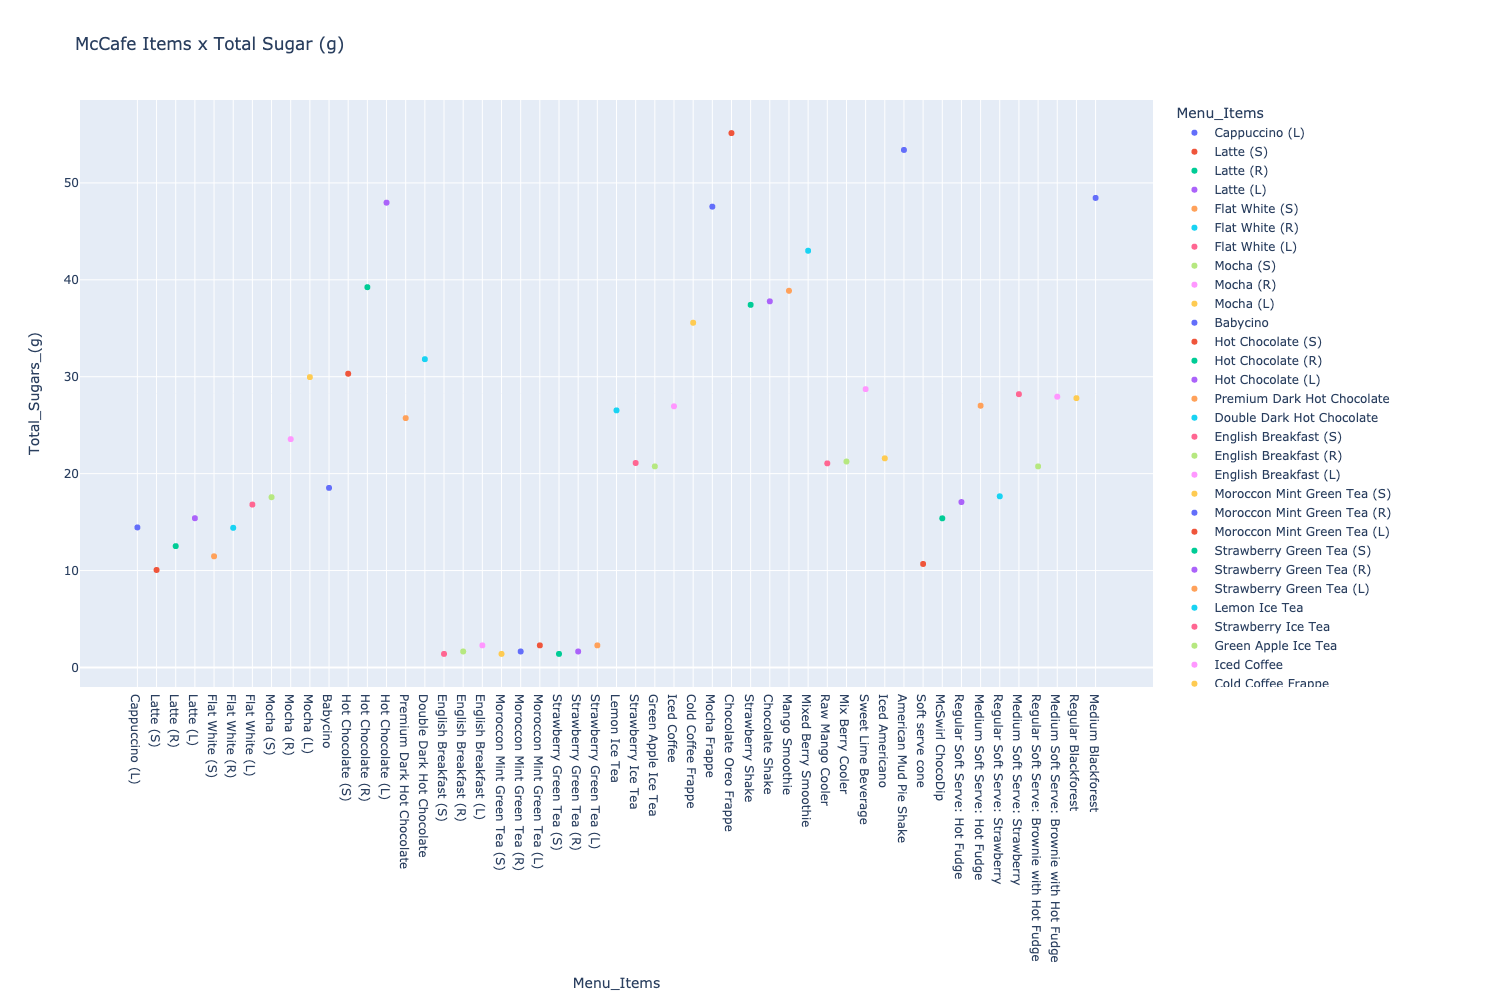

In [120]:
fig = px.scatter(mcCafeMenu, x="Menu_Items", y="Total_Sugars_(g)", color="Menu_Items", width=1500, height=1000,title="McCafe Items x Total Sugar (g)")
 
# showing the plot
fig.show("png")

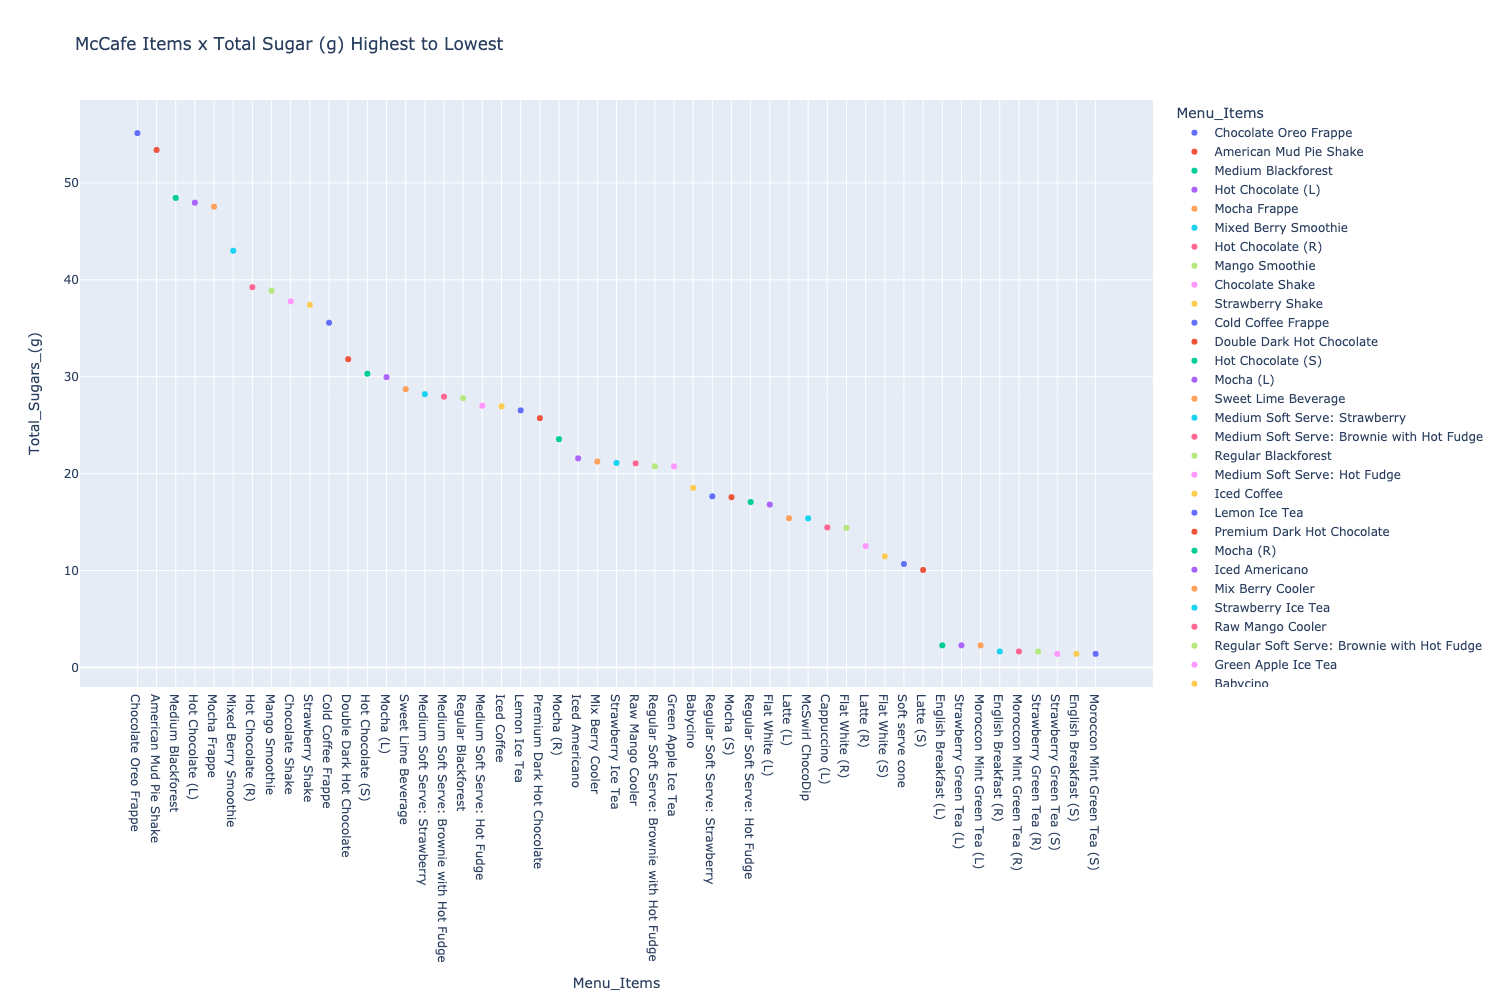

In [123]:
# Average is about 20 grams of sugar
mcCafeTotalSugarAsc = mcCafeMenu.sort_values(['Total_Sugars_(g)'], ascending=False)
fig = px.scatter(mcCafeTotalSugarAsc, x="Menu_Items", y="Total_Sugars_(g)", color="Menu_Items", width=1500, height=1000,title="McCafe Items x Total Sugar (g) Highest to Lowest")
fig.show("png")

In [99]:
# Indeed it is 22 grams of sugar on average
mcCafeMenu.describe()

,Energy_(kCal),Protein_(g),Total_fat_(g),Fat_(g),Sat_Fat_(g),Trans_fat_(g),Cholesterols_(mg),Total_carbohydrate_(g),Total_Sugars_(g),Natural_Sugar_(g),Added_Sugars_(g),Sodium_(mg)
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,183.679608,4.295490,5.945686,1.167059,4.558824,0.219804,12.861373,29.039412,22.615490,8.934510,13.680980,103.371961
std,120.232069,3.575361,5.096245,1.199609,4.133021,0.124330,12.127733,19.273616,14.639127,6.936725,12.628548,76.972027
min,6.250000,0.070000,0.040000,-0.460000,0.000000,0.000000,0.000000,0.280000,1.400000,0.640000,0.000000,9.610000
25%,101.685000,0.720000,0.460000,-0.040000,0.460000,0.130000,4.560000,18.115000,13.465000,2.280000,0.000000,29.475000
50%,185.850000,3.590000,5.470000,0.930000,3.660000,0.190000,8.550000,25.560000,21.100000,8.060000,12.490000,96.440000
75%,247.735000,6.800000,9.680000,2.145000,6.900000,0.325000,18.430000,42.355000,30.135000,12.875000,20.945000,160.210000
max,481.110000,12.080000,18.890000,3.320000,15.910000,0.460000,42.550000,79.040000,55.140000,30.460000,44.350000,332.600000


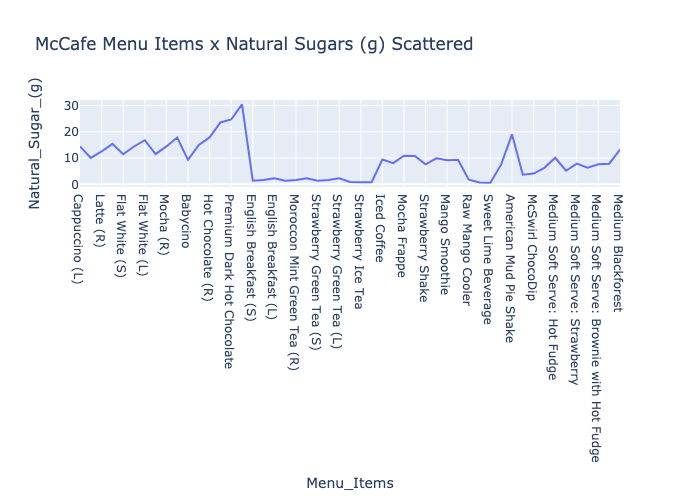

In [124]:
fig = px.line(mcCafeMenu, x="Menu_Items", y="Natural_Sugar_(g)",title="McCafe Menu Items x Natural Sugars (g) Scattered")
fig.show("png")

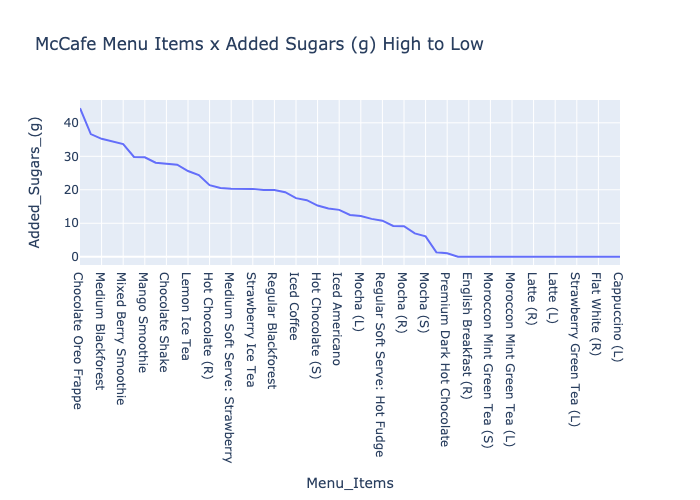

In [125]:
# Makes sense a Chocolate Oreo Frappe would have the highest added sugars.
mcCafeAddedSugarAsc = mcCafeMenu.sort_values(['Added_Sugars_(g)'], ascending=False)
fig = px.line(mcCafeAddedSugarAsc, x="Menu_Items", y="Added_Sugars_(g)",title="McCafe Menu Items x Added Sugars (g) High to Low")
fig.show("png")

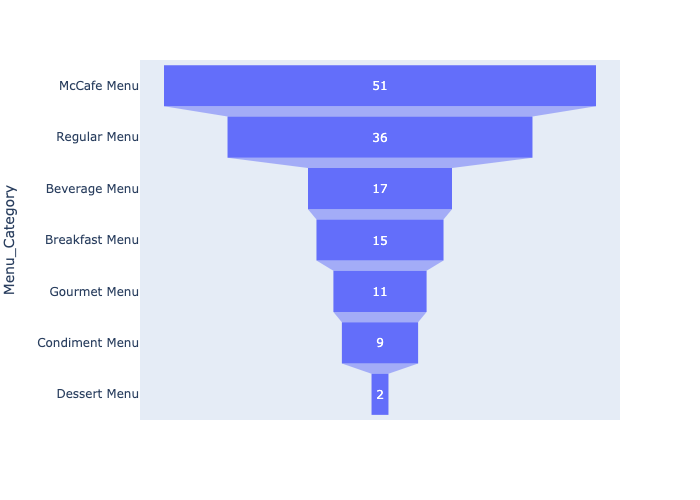

In [126]:
# Funnel chart depicting that number of items in each menu category McCafe being the highest, Dessert Menu being the lowest.
import plotly.express as px
data = dict(
    number=[51, 36, 17, 15,11,9,2],
    Menu_Category=["McCafe Menu", "Regular Menu", "Beverage Menu" , "Breakfast Menu", "Gourmet Menu", "Condiment Menu", "Dessert Menu"])
fig = px.funnel(data, x='number', y='Menu_Category')
fig.show("png")